# Sales Prediction(Online and Offline)

Step 1: Import Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Step 2: Import and Merge Data

In [24]:
def import_data(sales, orders):
    # Load data from CSV files
    sales_data = pd.read_csv(sales)
    orders_data = pd.read_csv(orders)
    merged_data = pd.merge(sales_data, orders_data, on='order_id')
    return merged_data

In [6]:
data = import_data("sales.csv", "orders.csv")
print(data.head())

   sales_id  order_id  product_id  price_per_unit  quantity  total_price  \
0         0         1         218             106         2          212   
1         1         1         481             118         1          118   
2         2         1           2              96         3          288   
3         3         1        1002             106         2          212   
4         4         1         691             113         3          339   

   customer_id  payment order_date delivery_date  
0           64    30811  2021-8-30    2021-09-24  
1           64    30811  2021-8-30    2021-09-24  
2           64    30811  2021-8-30    2021-09-24  
3           64    30811  2021-8-30    2021-09-24  
4           64    30811  2021-8-30    2021-09-24  


Step 3: Process data and generate data for purchase mode
Purchase mode 1 = online, 0 = offline

In [7]:
def prepare_data(data):

    # Extract month and year from order date
    data['order_date'] = pd.to_datetime(data['order_date'])
    data['year'] = data['order_date'].dt.year
    data['month'] = data['order_date'].dt.month

    # Calculate monthly sales
    monthly_sales = data.groupby(['year', 'month']).agg({'total_price': 'sum'}).reset_index()

    # Add a new column for online purchase (randomly generate 0 or 1) 
    monthly_sales['purchase_mode'] = np.random.randint(0, 2, size=len(monthly_sales))
    return monthly_sales


In [10]:
past_monthly_sales = prepare_data(data)
print(past_monthly_sales.head())

   year  month  total_price  purchase_mode
0  2021      1       119333              0
1  2021      2        95080              1
2  2021      3       131364              1
3  2021      4        97530              1
4  2021      5        85597              0


Step 4: Predict next year's sales using Random Forrest Regressor


Note: We only have 2021's data so we cannot split it into test and train set. Ideally we could have tested 2023's data against 2020 and 2021

In [17]:
def predict_sales(monthly_sales):
    X = monthly_sales[['year', 'month', 'purchase_mode']]
    y = monthly_sales['total_price']
    
    # Train the model using all available data
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X, y)
    
    # Make predictions for the next 12 months
    future_df = pd.DataFrame({'year': [2022] * 12, 'month': range(1, 13), 'purchase_mode': [0] * 12})
    predicted_sales = rf_model.predict(future_df)
    return predicted_sales

In [19]:
predicted_monthly_sales = predict_sales(past_monthly_sales)

Step 5: Visualise the past and future sales

In [21]:
def visualise(past_sales, predicted_sales):
    # Plot actual and predicted sales for both online and offline purchases
    fig, graph = plt.subplots(2, figsize=(10, 10))
    
    # Plot for offline purchases
    offline_sales = past_sales[past_sales['purchase_mode'] == 0]
    graph[0].plot(offline_sales.index[-12:], offline_sales['total_price'].tail(12), marker='o', color='green', label='Actual Offline Sales 2021')
    graph[0].plot(range(12), predicted_sales, marker='x', color='blue', linestyle='--', label='Predicted Offline Sales 2022')
    graph[0].set_title('Offline Sales')
    graph[0].set_xlabel('Month')
    graph[0].set_ylabel('Total Sales (in dollars)')
    graph[0].legend()
    
    # Plot for online purchases
    online_sales = past_sales[past_sales['purchase_mode'] == 1]
    graph[1].plot(online_sales.index[-12:], online_sales['total_price'].tail(12), marker='o', color='green', label='Actual Online Sales 2021')
    graph[1].plot(range(12), predicted_sales, marker='x', color='blue', linestyle='--', label='Predicted Online Sales 2022')
    graph[1].set_title('Online Sales')
    graph[1].set_xlabel('Month')
    graph[1].set_ylabel('Total Sales (in dollars)')
    graph[1].legend()
    
    plt.tight_layout()
    plt.show()

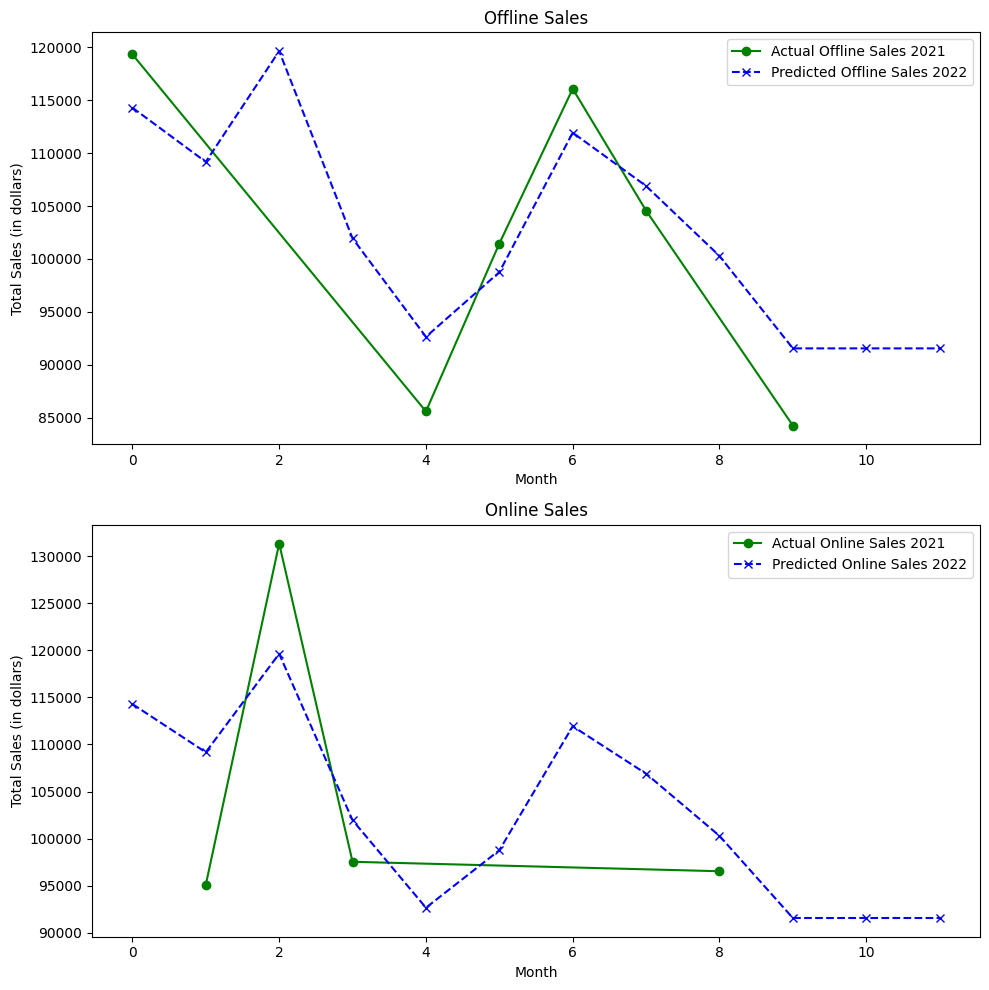

In [22]:
visualise(past_monthly_sales, predicted_monthly_sales)